In [1]:
import HEAD_RECON
import multi_head
import copy
import numpy as np
import matplotlib.pyplot as plt
import cv2
from scipy.ndimage.morphology import binary_fill_holes
import sys
np.set_printoptions(threshold=sys.maxsize)

%load_ext autoreload
%autoreload 2

<IPython.core.display.Javascript object>

1 :


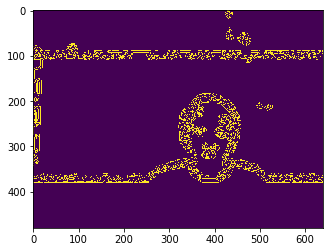

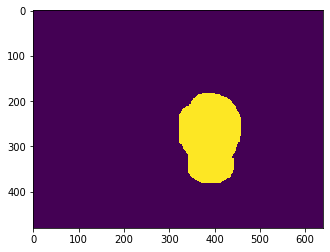

2 :


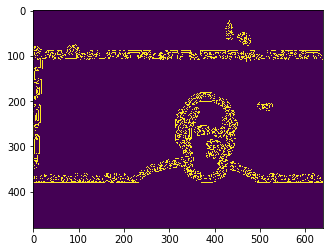

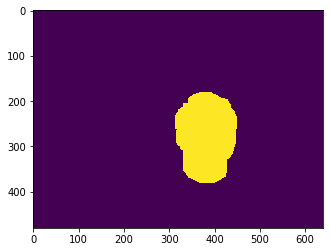

3 :


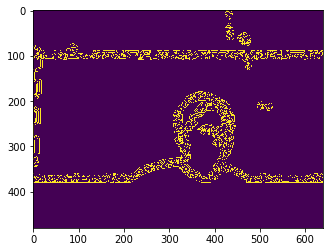

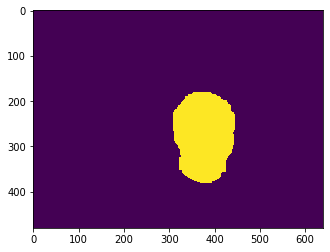

4 :


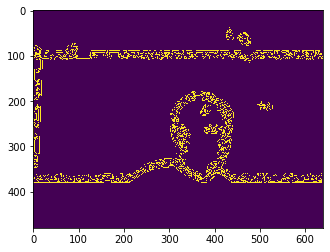

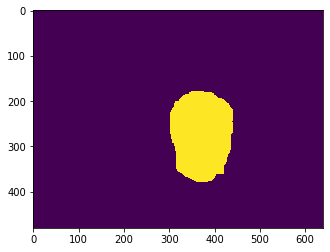

5 :


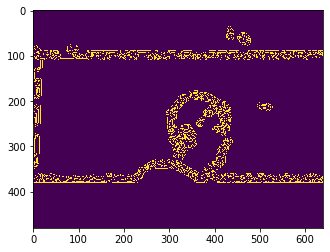

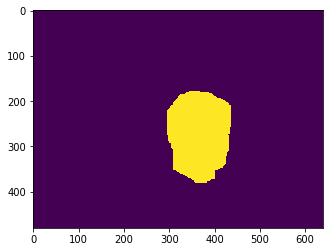

6 :


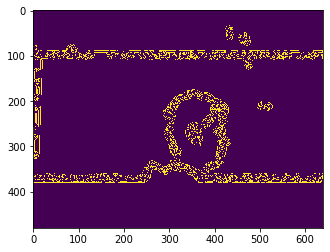

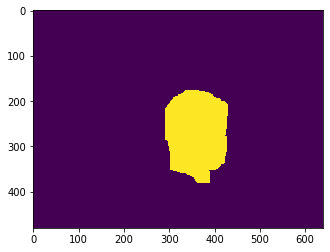

7 :


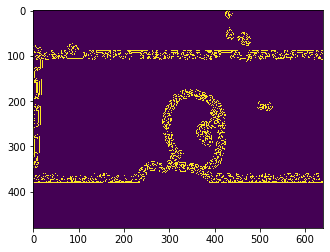

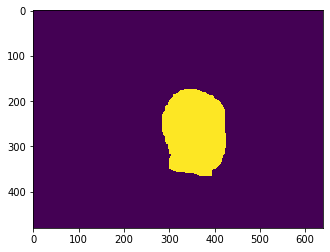

8 :


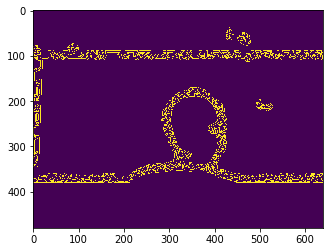

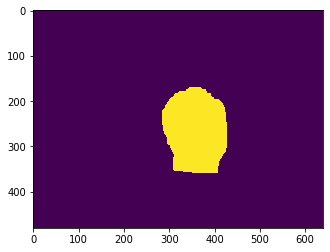

9 :


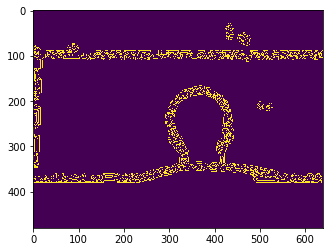

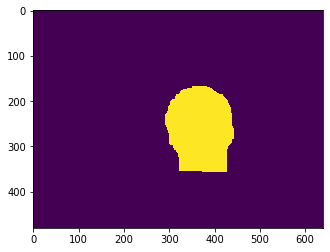

10 :


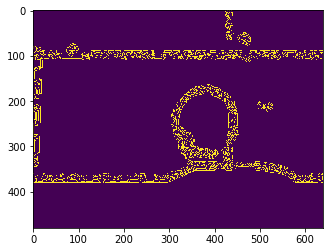

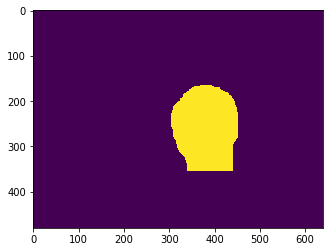

11 :


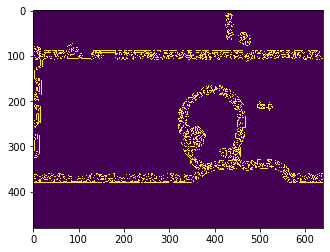

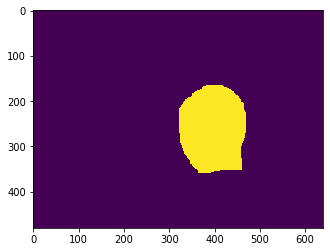

12 :


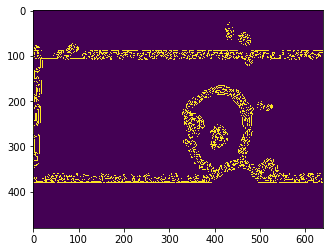

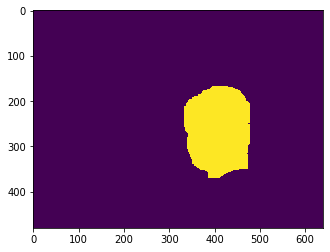

13 :


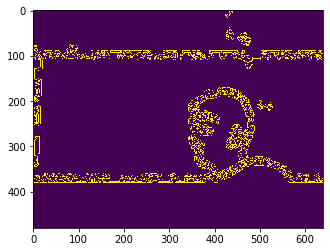

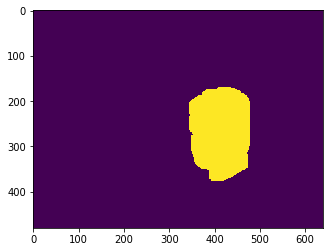

14 :


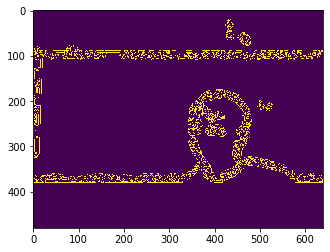

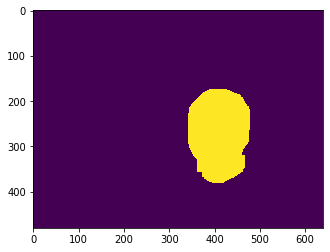

In [79]:
# test edge_based_filter
for i in range(1,15):
    print(i,":")
    image = cv2.imread('./head_2d_image/full_1_{}.png'.format(i))
    image[370:,:]=0
    blurred = cv2.GaussianBlur(image, (3,3), 0)
    blurred[:100,:]=0
    blurred[380:,:]=0
    
    edge = cv2.Canny(blurred,100,250)
    
    for i in range (10):
        _, contours, hierarchy = cv2.findContours(edge,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
        image_another = image.copy()
        cv2.drawContours(image_another, contours, -1, (255,0,0), 0)
        edge = cv2.Canny(image_another,200,250)

    plt.imshow(edge);plt.show()
    edge[:,480:]=0
    edge[:,:260]=0
    kernel = np.ones((3,3))
    dilation = cv2.dilate(edge,kernel,iterations =1)

    im_floodfill = binary_fill_holes(dilation)
    im_floodfill = im_floodfill*1
    im_floodfill = np.uint8(im_floodfill)

    
    erode = cv2.erode(im_floodfill,kernel,iterations=12)
    dilation = cv2.dilate(erode,kernel,iterations =12)
    plt.imshow(dilation);plt.show()

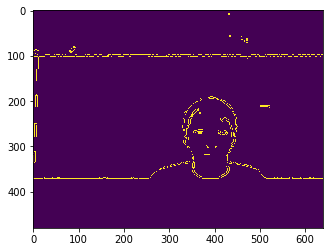

(307200,)
(19789,)
dangling removal done
color filter done.


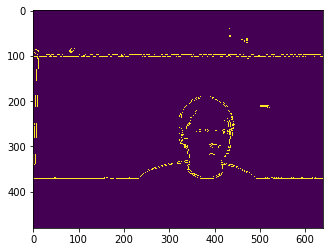

(307200,)
(20037,)
dangling removal done
color filter done.


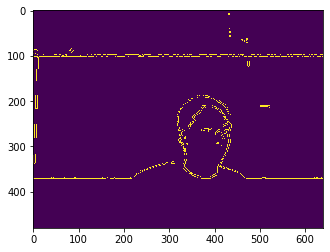

(307200,)
(20103,)
dangling removal done
color filter done.


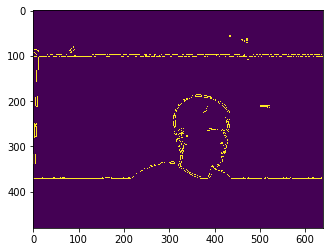

(307200,)
(20794,)
dangling removal done
color filter done.


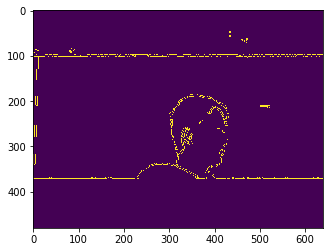

(307200,)
(21404,)
dangling removal done
color filter done.


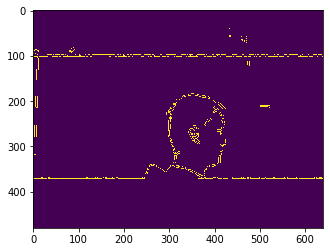

(307200,)
(20995,)
dangling removal done
color filter done.


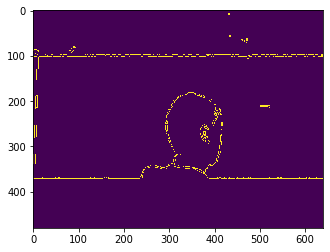

(307200,)
(20515,)
dangling removal done
color filter done.


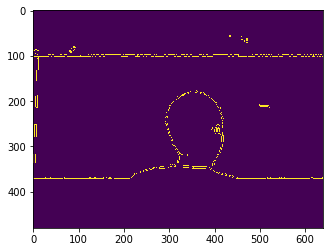

(307200,)
(20211,)
dangling removal done
color filter done.


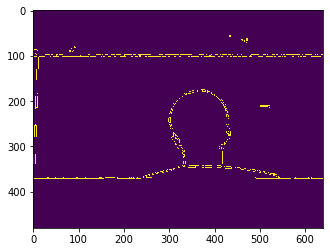

(307200,)
(21196,)
dangling removal done
color filter done.


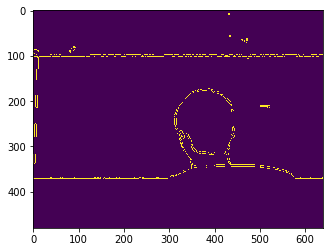

(307200,)
(21205,)
dangling removal done
color filter done.


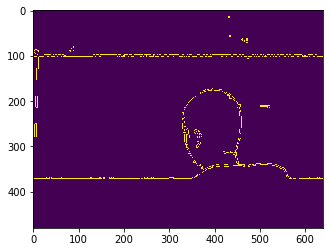

(307200,)
(21730,)
dangling removal done
color filter done.


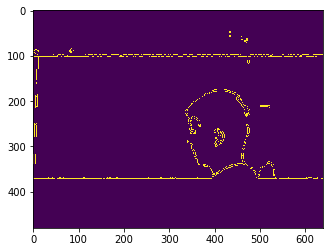

(307200,)
(22809,)
dangling removal done
color filter done.


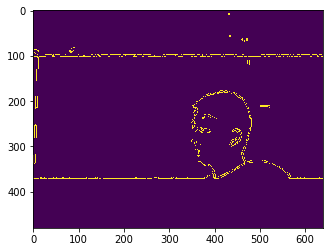

(307200,)
(22241,)
dangling removal done
color filter done.


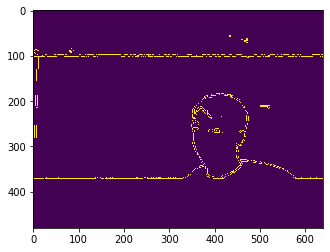

(307200,)
(21068,)
dangling removal done
color filter done.


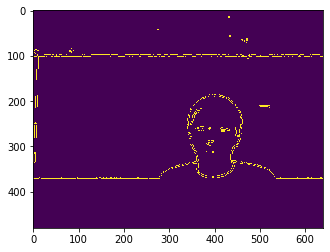

(307200,)
(20134,)
dangling removal done
color filter done.


In [97]:
# gen 2d images
for i in range(1,16):
    head = HEAD_RECON.threeD_head.read_from_file(1,i)
    head.reset_filters()
    # self.reset_filters()
    head.edge_based_filter()
    head.filter_nan()
    head.filter_depth(1.5)
    head.sparsify(1)
#     head.remove_dangling()
    print("dangling removal done")
#     head.remove_background_color()
    print("color filter done.")
    head.center()
    head.get_filtered_image()
    head.create_vpython_spheres()
    head.save()

1


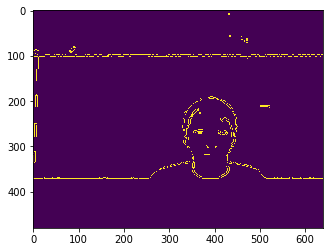

(307200,)
(19789,)
depth filter done.
dangling removal done
color filter done.
2


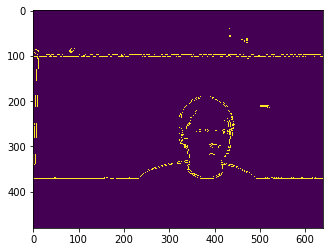

(307200,)
(20037,)
depth filter done.
dangling removal done
color filter done.
3


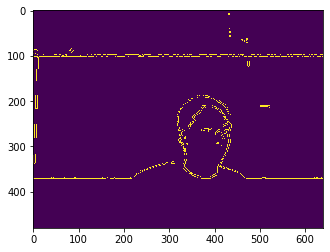

(307200,)
(20103,)
depth filter done.
dangling removal done
color filter done.
4


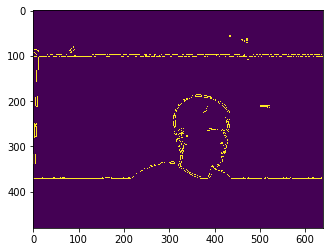

(307200,)
(20794,)
depth filter done.
dangling removal done
color filter done.
5


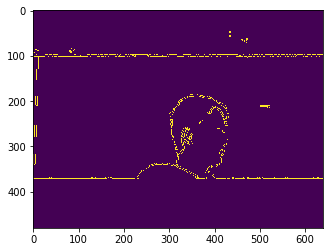

(307200,)
(21404,)
depth filter done.
dangling removal done
color filter done.
6


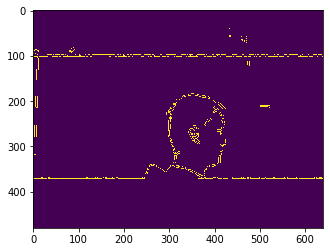

(307200,)
(20995,)
depth filter done.
dangling removal done
color filter done.
7


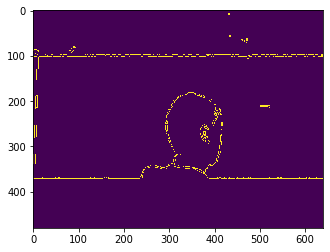

(307200,)
(20515,)
depth filter done.
dangling removal done
color filter done.
8


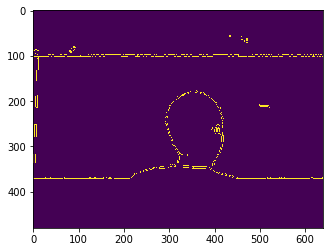

(307200,)
(20211,)
depth filter done.
dangling removal done
color filter done.
9


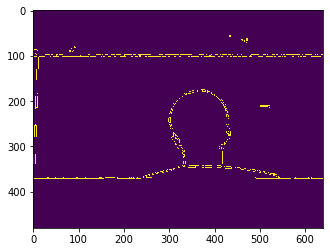

(307200,)
(21196,)
depth filter done.
dangling removal done
color filter done.
10


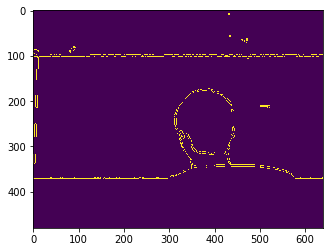

(307200,)
(21205,)
depth filter done.
dangling removal done
color filter done.
11


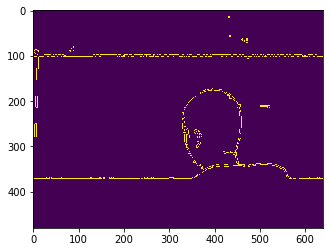

(307200,)
(21730,)
depth filter done.
dangling removal done
color filter done.
12


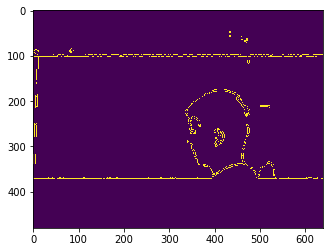

(307200,)
(22809,)
depth filter done.
dangling removal done
color filter done.
13


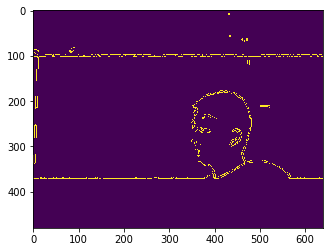

(307200,)
(22241,)
depth filter done.
dangling removal done
color filter done.
14


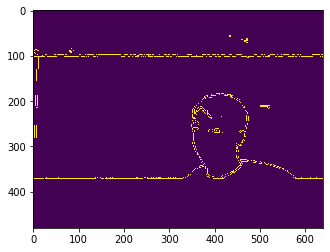

(307200,)
(21068,)
depth filter done.
dangling removal done
color filter done.
15


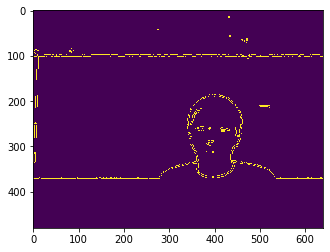

(307200,)
(20134,)
depth filter done.
dangling removal done
color filter done.


In [93]:
# gen pickled heads
for i in range(1,16):
    print(i)
    head = HEAD_RECON.threeD_head.read_from_file(1,i)
    head.full_filter()

In [94]:
# load heads
all_heads=[HEAD_RECON.threeD_head.load_from_pickle(1,i) for i in range (1,16)]

In [4]:
# make head from first to last
def make_mhead(all_heads, first, last):
    all_heads[first].paint([1,0,0])
    all_heads[first].reset_positions()
    all_heads[first].reset_colors()
    all_heads[first+1].reset_positions()
    all_heads[first+1].reset_colors()    
    
    heads = multi_head.MultiHead.joined_heads(all_heads[first], all_heads[first+1])
    heads.icp_transform(0,1)
    for i in range(first+2,last+1):
        all_heads[i].reset_positions()
        all_heads[i].reset_colors()  
        print (i)
        heads.append_head(all_heads[i])
        print("join {}, {}".format(i-1-first,i-first))
        heads.join_heads_wraper(i-1-first,i-first)
        heads.icp_transform(i-1-first,i-first)
    heads.save(sparcity=1) 
    print ("completed")
    return heads

ids are not unique
Searching (head 0 and 1), 0/84 done, distance: 0.01921628068748988
ids are not unique
Searching (head 0 and 1), 1/84 done, distance: 0.014955556268295879
ids are not unique
Searching (head 0 and 1), 2/84 done, distance: 0.016350920549775452
ids are not unique
Searching (head 0 and 1), 3/84 done, distance: 0.014077801199147488
ids are not unique
Searching (head 0 and 1), 4/84 done, distance: 0.017097560974209298
ids are not unique
Searching (head 0 and 1), 5/84 done, distance: 0.015026234956373397
ids are not unique
Searching (head 0 and 1), 6/84 done, distance: 0.01455832479936502
Searching (head 0 and 1), 7/84 done, distance: 0.018197228933568548
ids are not unique
Searching (head 0 and 1), 8/84 done, distance: 0.016131578759279196
ids are not unique
Searching (head 0 and 1), 9/84 done, distance: 0.014619563928738187
ids are not unique
Searching (head 0 and 1), 10/84 done, distance: 0.01449288064649551
ids are not unique
Searching (head 0 and 1), 11/84 done, distanc

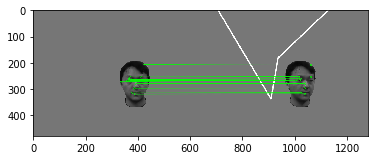

ids are not unique
start icp
step:  0 before:  0.0073285221436038515
found the best fit transform 0
2
join 1, 2
ids are not unique
Searching (head 1 and 2), 0/84 done, distance: 0.01680397247595404
ids are not unique
Searching (head 1 and 2), 1/84 done, distance: 0.018204668456604962
ids are not unique
Searching (head 1 and 2), 2/84 done, distance: 0.018356832311501415
ids are not unique
Searching (head 1 and 2), 3/84 done, distance: 0.019488875039714297
ids are not unique
Searching (head 1 and 2), 4/84 done, distance: 0.0192466883290722
ids are not unique
Searching (head 1 and 2), 5/84 done, distance: 0.0183569266036113
ids are not unique
Searching (head 1 and 2), 6/84 done, distance: 0.01779757660943142
ids are not unique
Searching (head 1 and 2), 7/84 done, distance: 0.017548836977141127
ids are not unique
Searching (head 1 and 2), 8/84 done, distance: 0.01746276711824113
ids are not unique
Searching (head 1 and 2), 9/84 done, distance: 0.024808216482201533
ids are not unique
Search

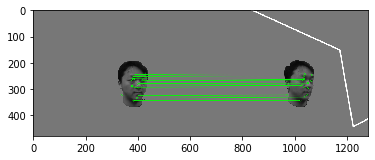

start icp
step:  0 before:  0.00846260018297804
found the best fit transform 0
3
join 2, 3
ids are not unique
Searching (head 2 and 3), 0/84 done, distance: 0.02407628230294335
ids are not unique
Searching (head 2 and 3), 1/84 done, distance: 0.021420840818953398
ids are not unique
Searching (head 2 and 3), 2/84 done, distance: 0.02030169730780963
ids are not unique
Searching (head 2 and 3), 3/84 done, distance: 0.018705025965496627
ids are not unique
Searching (head 2 and 3), 4/84 done, distance: 0.022327090182376122
ids are not unique
Searching (head 2 and 3), 5/84 done, distance: 0.021557902392336906
ids are not unique
Searching (head 2 and 3), 6/84 done, distance: 0.020853413792536177
ids are not unique
Searching (head 2 and 3), 7/84 done, distance: 0.01984430416593637
ids are not unique
Searching (head 2 and 3), 8/84 done, distance: 0.020612878786896435
ids are not unique
Searching (head 2 and 3), 9/84 done, distance: 0.015767290260866745
ids are not unique
Searching (head 2 and 3

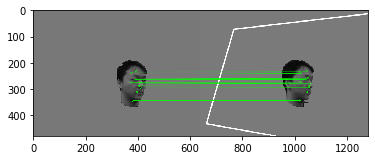

ids are not unique
start icp
step:  0 before:  0.008244702897699291
found the best fit transform 0
4
join 3, 4
ids are not unique
Searching (head 3 and 4), 0/84 done, distance: 0.014548806958431606
ids are not unique
Searching (head 3 and 4), 1/84 done, distance: 0.019410695911880924
ids are not unique
Searching (head 3 and 4), 2/84 done, distance: 0.015409509458741378
ids are not unique
Searching (head 3 and 4), 3/84 done, distance: 0.018500206493265798
ids are not unique
Searching (head 3 and 4), 4/84 done, distance: 0.0164606284746998
ids are not unique
Searching (head 3 and 4), 5/84 done, distance: 0.018709329902714435
ids are not unique
Searching (head 3 and 4), 6/84 done, distance: 0.021161701817343007
ids are not unique
Searching (head 3 and 4), 7/84 done, distance: 0.01963197407919041
ids are not unique
Searching (head 3 and 4), 8/84 done, distance: 0.020284901886349422
ids are not unique
Searching (head 3 and 4), 9/84 done, distance: 0.023782487967259756
ids are not unique
Sea

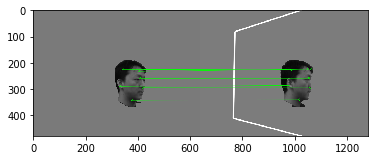

start icp
step:  0 before:  0.006516899357172512
found the best fit transform 0
5
join 4, 5
ids are not unique
Searching (head 4 and 5), 0/84 done, distance: 0.021123311648581083
ids are not unique
Searching (head 4 and 5), 1/84 done, distance: 0.023383332442654396
ids are not unique
Searching (head 4 and 5), 2/84 done, distance: 0.02339521144643108
ids are not unique
Searching (head 4 and 5), 3/84 done, distance: 0.022945471742418164
ids are not unique
Searching (head 4 and 5), 4/84 done, distance: 0.023451972778114033
ids are not unique
Searching (head 4 and 5), 5/84 done, distance: 0.02168161235502232
ids are not unique
Searching (head 4 and 5), 6/84 done, distance: 0.024015103287752165
ids are not unique
Searching (head 4 and 5), 7/84 done, distance: 0.023370085440109708
ids are not unique
Searching (head 4 and 5), 8/84 done, distance: 0.023123332999742584
ids are not unique
Searching (head 4 and 5), 9/84 done, distance: 0.024877803139830512
ids are not unique
Searching (head 4 and

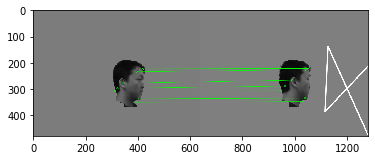

ids are not unique
start icp
step:  0 before:  0.009562204451023789
found the best fit transform 0
6
join 5, 6
ids are not unique
Searching (head 5 and 6), 0/84 done, distance: 0.020544249750240152
ids are not unique
Searching (head 5 and 6), 1/84 done, distance: 0.021815563363959643
ids are not unique
Searching (head 5 and 6), 2/84 done, distance: 0.02420611870292133
ids are not unique
Searching (head 5 and 6), 3/84 done, distance: 0.022884858365599337
ids are not unique
Searching (head 5 and 6), 4/84 done, distance: 0.020068398082579215
ids are not unique
Searching (head 5 and 6), 5/84 done, distance: 0.022347986878381035
ids are not unique
Searching (head 5 and 6), 6/84 done, distance: 0.019030853883162814
ids are not unique
Searching (head 5 and 6), 7/84 done, distance: 0.021806994172846678
ids are not unique
Searching (head 5 and 6), 8/84 done, distance: 0.019147931558339104
ids are not unique
Searching (head 5 and 6), 9/84 done, distance: 0.021910626084050658
ids are not unique
S

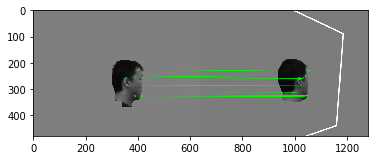

start icp
step:  0 before:  0.009694578395511251
found the best fit transform 0
7
join 6, 7
ids are not unique
Searching (head 6 and 7), 0/84 done, distance: 0.022825134746711214
ids are not unique
Searching (head 6 and 7), 1/84 done, distance: 0.022768664158504884
ids are not unique
Searching (head 6 and 7), 2/84 done, distance: 0.020059606646709235
ids are not unique
Searching (head 6 and 7), 3/84 done, distance: 0.0209272343689035
ids are not unique
Searching (head 6 and 7), 4/84 done, distance: 0.022535995336643997
ids are not unique
Searching (head 6 and 7), 5/84 done, distance: 0.02140233865998802
ids are not unique
Searching (head 6 and 7), 6/84 done, distance: 0.0416685760536916
ids are not unique
Searching (head 6 and 7), 7/84 done, distance: 0.018473123673839485
ids are not unique
Searching (head 6 and 7), 8/84 done, distance: 0.01851754717855022
ids are not unique
Searching (head 6 and 7), 9/84 done, distance: 0.033700749194679074
ids are not unique
Searching (head 6 and 7),

/Users/caseliang/Repositories/AV_CW/Procrustes2.py:62: RuntimeWarning: invalid value encountered in true_divide
  X0 /= normX
/Users/caseliang/Repositories/AV_CW/Procrustes2.py:63: RuntimeWarning: invalid value encountered in true_divide
  Y0 /= normY


Searching (head 6 and 7), 25/84 done, distance: 0.044290807773095305
Searching (head 6 and 7), 26/84 done, distance: 0.046275320213963037
ids are not unique
Searching (head 6 and 7), 27/84 done, distance: 0.052889098188267904
ids are not unique
Searching (head 6 and 7), 28/84 done, distance: 0.025876164243180493
ids are not unique
Searching (head 6 and 7), 29/84 done, distance: 0.02642500028748613
Not enough matches are found - 4/4, turn up the match ratio.
Not enough matches are found - 4/4, turn up the match ratio.
Not enough matches are found - 3/4, turn up the match ratio.
Not enough matches are found - 4/4, turn up the match ratio.


/Users/caseliang/Repositories/AV_CW/Procrustes2.py:62: RuntimeWarning: invalid value encountered in true_divide
  X0 /= normX
/Users/caseliang/Repositories/AV_CW/Procrustes2.py:63: RuntimeWarning: invalid value encountered in true_divide
  Y0 /= normY


Searching (head 6 and 7), 38/84 done, distance: 0.03838160975594407
Not enough matches are found - 1/4, turn up the match ratio.
Not enough matches are found - 3/4, turn up the match ratio.
ids are not unique
Searching (head 6 and 7), 41/84 done, distance: 0.052971836544337216
Not enough matches are found - 1/4, turn up the match ratio.
Not enough matches are found - 1/4, turn up the match ratio.
Not enough matches are found - 4/4, turn up the match ratio.
Not enough matches are found - 3/4, turn up the match ratio.
Searching (head 6 and 7), 49/84 done, distance: 0.026203120496820158
Searching (head 6 and 7), 50/84 done, distance: 0.03912828468794685
Not enough matches are found - 3/4, turn up the match ratio.
Not enough matches are found - 4/4, turn up the match ratio.
Not enough matches are found - 3/4, turn up the match ratio.
Not enough matches are found - 3/4, turn up the match ratio.
Not enough matches are found - 3/4, turn up the match ratio.
Not enough matches are found - 4/4, 

/Users/caseliang/Repositories/AV_CW/Procrustes2.py:62: RuntimeWarning: invalid value encountered in true_divide
  X0 /= normX
/Users/caseliang/Repositories/AV_CW/Procrustes2.py:63: RuntimeWarning: invalid value encountered in true_divide
  Y0 /= normY


Searching (head 6 and 7), 74/84 done, distance: 0.035035935382230744
Not enough matches are found - 4/4, turn up the match ratio.
Not enough matches are found - 2/4, turn up the match ratio.
Not enough matches are found - 3/4, turn up the match ratio.
Not enough matches are found - 3/4, turn up the match ratio.
Not enough matches are found - 3/4, turn up the match ratio.
Not enough matches are found - 3/4, turn up the match ratio.
Not enough matches are found - 3/4, turn up the match ratio.
15 min_dist 0.018229275943913097 params: [ 0.04 10.    1.  ]


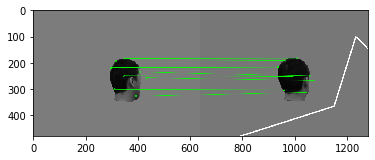

start icp
step:  0 before:  0.009809380480327255
found the best fit transform 0
completed


In [16]:
make_mhead(all_heads,0,7)

ids are not unique
Searching (head 0 and 1), 0/84 done, Error: 0.022396544424621516
ids are not unique
Searching (head 0 and 1), 1/84 done, Error: 0.022116108894455873
ids are not unique
Searching (head 0 and 1), 2/84 done, Error: 0.02161573771939109
ids are not unique
Searching (head 0 and 1), 3/84 done, Error: 0.021447905610503873
ids are not unique
Searching (head 0 and 1), 4/84 done, Error: 0.031091594958642978
ids are not unique
Searching (head 0 and 1), 5/84 done, Error: 0.021229203356235717
ids are not unique
Searching (head 0 and 1), 6/84 done, Error: 0.018929331733356123
ids are not unique
Searching (head 0 and 1), 7/84 done, Error: 0.01831810518821217
ids are not unique
Searching (head 0 and 1), 8/84 done, Error: 0.020046136633310507
ids are not unique
Searching (head 0 and 1), 9/84 done, Error: 0.02101735938131416
ids are not unique
Searching (head 0 and 1), 10/84 done, Error: 0.023525143813238714
ids are not unique
Searching (head 0 and 1), 11/84 done, Error: 0.021590581190

/Users/caseliang/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/caseliang/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Not enough matches are found - 0/4, turn up the match ratio.
Not enough matches are found - 0/4, turn up the match ratio.
Not enough matches are found - 0/4, turn up the match ratio.
ids are not unique
Searching (head 0 and 1), 49/84 done, Error: 0.03203840553760426
ids are not unique
Searching (head 0 and 1), 50/84 done, Error: 0.04644605973575459
Not enough matches are found - 4/4, turn up the match ratio.
Searching (head 0 and 1), 53/84 done, Error: 0.033428768866611044
Not enough matches are found - 3/4, turn up the match ratio.
Not enough matches are found - 4/4, turn up the match ratio.
Not enough matches are found - 4/4, turn up the match ratio.
Not enough matches are found - 2/4, turn up the match ratio.
Not enough matches are found - 2/4, turn up the match ratio.
Not enough matches are found - 2/4, turn up the match ratio.
Not enough matches are found - 4/4, turn up the match ratio.
Searching (head 0 and 1), 61/84 done, Error: 0.00938705900102114


/Users/caseliang/Repositories/AV_CW/Procrustes2.py:62: RuntimeWarning: invalid value encountered in true_divide
  X0 /= normX
/Users/caseliang/Repositories/AV_CW/Procrustes2.py:63: RuntimeWarning: invalid value encountered in true_divide
  Y0 /= normY


Not enough matches are found - 4/4, turn up the match ratio.
Not enough matches are found - 3/4, turn up the match ratio.
Not enough matches are found - 4/4, turn up the match ratio.
Not enough matches are found - 2/4, turn up the match ratio.
Not enough matches are found - 2/4, turn up the match ratio.
Not enough matches are found - 2/4, turn up the match ratio.
Not enough matches are found - 4/4, turn up the match ratio.
Not enough matches are found - 4/4, turn up the match ratio.
Not enough matches are found - 4/4, turn up the match ratio.
Not enough matches are found - 4/4, turn up the match ratio.
Not enough matches are found - 3/4, turn up the match ratio.
Not enough matches are found - 3/4, turn up the match ratio.
Not enough matches are found - 2/4, turn up the match ratio.
Not enough matches are found - 2/4, turn up the match ratio.
Not enough matches are found - 2/4, turn up the match ratio.
61 min_error 0.00938705900102114 params: [ 0.02 20.    5.  ]


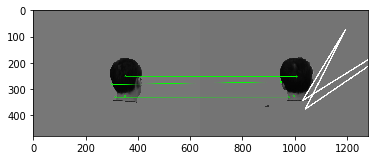

start icp
step:  0 before:  0.009386958954773475
found the best fit transform 0
9
join 1, 2
ids are not unique
Searching (head 1 and 2), 0/84 done, Error: 0.01732475583492832
ids are not unique
Searching (head 1 and 2), 1/84 done, Error: 0.017438120159074293
ids are not unique
Searching (head 1 and 2), 2/84 done, Error: 0.01637555812657384
ids are not unique
Searching (head 1 and 2), 3/84 done, Error: 0.02030833370988367
ids are not unique
Searching (head 1 and 2), 4/84 done, Error: 0.016204533136719667
ids are not unique
Searching (head 1 and 2), 5/84 done, Error: 0.016476929726249107
ids are not unique
Searching (head 1 and 2), 6/84 done, Error: 0.01712592287798889
ids are not unique
Searching (head 1 and 2), 7/84 done, Error: 0.025450314718744795
ids are not unique
Searching (head 1 and 2), 8/84 done, Error: 0.025346613692579574
ids are not unique
Searching (head 1 and 2), 9/84 done, Error: 0.01663770782638821
ids are not unique
Searching (head 1 and 2), 10/84 done, Error: 0.0160540

/Users/caseliang/Repositories/AV_CW/Procrustes2.py:62: RuntimeWarning: invalid value encountered in true_divide
  X0 /= normX
/Users/caseliang/Repositories/AV_CW/Procrustes2.py:63: RuntimeWarning: invalid value encountered in true_divide
  Y0 /= normY


Not enough matches are found - 3/4, turn up the match ratio.
Not enough matches are found - 3/4, turn up the match ratio.
Not enough matches are found - 2/4, turn up the match ratio.
Not enough matches are found - 2/4, turn up the match ratio.
Not enough matches are found - 2/4, turn up the match ratio.
ids are not unique
Searching (head 1 and 2), 48/84 done, Error: 0.03921739447703605
ids are not unique
Searching (head 1 and 2), 49/84 done, Error: 0.012099029634409838
ids are not unique
Searching (head 1 and 2), 50/84 done, Error: 0.011867475651079682
Not enough matches are found - 4/4, turn up the match ratio.
ids are not unique


/Users/caseliang/Repositories/AV_CW/Procrustes2.py:62: RuntimeWarning: invalid value encountered in true_divide
  X0 /= normX
/Users/caseliang/Repositories/AV_CW/Procrustes2.py:63: RuntimeWarning: invalid value encountered in true_divide
  Y0 /= normY


ids are not unique
Not enough matches are found - 3/4, turn up the match ratio.
Not enough matches are found - 2/4, turn up the match ratio.
Not enough matches are found - 2/4, turn up the match ratio.
Not enough matches are found - 2/4, turn up the match ratio.
Searching (head 1 and 2), 61/84 done, Error: 0.025531828030542804


/Users/caseliang/Repositories/AV_CW/Procrustes2.py:62: RuntimeWarning: invalid value encountered in true_divide
  X0 /= normX
/Users/caseliang/Repositories/AV_CW/Procrustes2.py:63: RuntimeWarning: invalid value encountered in true_divide
  Y0 /= normY


Not enough matches are found - 3/4, turn up the match ratio.
Not enough matches are found - 4/4, turn up the match ratio.
Not enough matches are found - 2/4, turn up the match ratio.
Not enough matches are found - 3/4, turn up the match ratio.
Not enough matches are found - 3/4, turn up the match ratio.
Not enough matches are found - 2/4, turn up the match ratio.
Not enough matches are found - 2/4, turn up the match ratio.
Not enough matches are found - 2/4, turn up the match ratio.
Not enough matches are found - 4/4, turn up the match ratio.
Searching (head 1 and 2), 73/84 done, Error: 0.03819398935408189
Searching (head 1 and 2), 74/84 done, Error: 0.038562428715714574
Not enough matches are found - 3/4, turn up the match ratio.


/Users/caseliang/Repositories/AV_CW/Procrustes2.py:62: RuntimeWarning: invalid value encountered in true_divide
  X0 /= normX
/Users/caseliang/Repositories/AV_CW/Procrustes2.py:63: RuntimeWarning: invalid value encountered in true_divide
  Y0 /= normY


Not enough matches are found - 2/4, turn up the match ratio.
Not enough matches are found - 2/4, turn up the match ratio.
Not enough matches are found - 2/4, turn up the match ratio.
Not enough matches are found - 2/4, turn up the match ratio.
26 min_error 0.010900359035297312 params: [2.e-02 3.e+01 2.e+00]


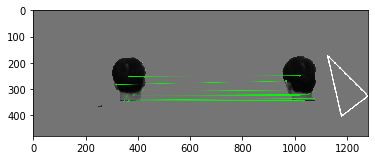

ids are not unique
start icp
step:  0 before:  0.0075858623035989226
found the best fit transform 0
10
join 2, 3
ids are not unique
Searching (head 2 and 3), 0/84 done, Error: 0.02822707548704606
ids are not unique
Searching (head 2 and 3), 1/84 done, Error: 0.0288362498483785
ids are not unique
Searching (head 2 and 3), 2/84 done, Error: 0.02379866335156617
ids are not unique
Searching (head 2 and 3), 3/84 done, Error: 0.028926040156081204
ids are not unique
Searching (head 2 and 3), 4/84 done, Error: 0.027897159392807715
ids are not unique
Searching (head 2 and 3), 5/84 done, Error: 0.02460350130993952
ids are not unique
Searching (head 2 and 3), 6/84 done, Error: 0.035160103469614123
ids are not unique
Searching (head 2 and 3), 7/84 done, Error: 0.02924284934825623
ids are not unique
Searching (head 2 and 3), 8/84 done, Error: 0.02530012729585047
ids are not unique
Searching (head 2 and 3), 9/84 done, Error: 0.06557363194990144
ids are not unique
Searching (head 2 and 3), 10/84 done

/Users/caseliang/Repositories/AV_CW/Procrustes2.py:62: RuntimeWarning: invalid value encountered in true_divide
  X0 /= normX
/Users/caseliang/Repositories/AV_CW/Procrustes2.py:63: RuntimeWarning: invalid value encountered in true_divide
  Y0 /= normY


ids are not unique
ids are not unique
Searching (head 2 and 3), 35/84 done, Error: 0.0445971915602698
Searching (head 2 and 3), 36/84 done, Error: 0.04329610043365323
Searching (head 2 and 3), 37/84 done, Error: 0.025066382779575635
Searching (head 2 and 3), 38/84 done, Error: 0.02510726422029976


/Users/caseliang/Repositories/AV_CW/Procrustes2.py:62: RuntimeWarning: invalid value encountered in true_divide
  X0 /= normX
/Users/caseliang/Repositories/AV_CW/Procrustes2.py:63: RuntimeWarning: invalid value encountered in true_divide
  Y0 /= normY


Searching (head 2 and 3), 40/84 done, Error: 0.04765538797794435
Searching (head 2 and 3), 41/84 done, Error: 0.04195821003350806
Not enough matches are found - 4/4, turn up the match ratio.
Not enough matches are found - 4/4, turn up the match ratio.
Not enough matches are found - 4/4, turn up the match ratio.
Not enough matches are found - 2/4, turn up the match ratio.
Not enough matches are found - 2/4, turn up the match ratio.
Not enough matches are found - 2/4, turn up the match ratio.
Searching (head 2 and 3), 48/84 done, Error: 0.047382577331975595
Searching (head 2 and 3), 49/84 done, Error: 0.038215305735683186
Searching (head 2 and 3), 50/84 done, Error: 0.014238475955369366
Searching (head 2 and 3), 51/84 done, Error: 0.013966832743706987
Searching (head 2 and 3), 52/84 done, Error: 0.01651275451783556
Searching (head 2 and 3), 53/84 done, Error: 0.02874095281691646
Searching (head 2 and 3), 54/84 done, Error: 0.04932703418019086
ids are not unique
Searching (head 2 and 3), 

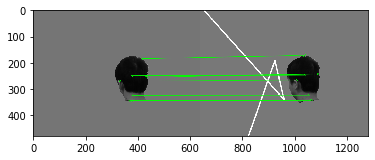

ids are not unique
start icp
step:  0 before:  0.008814997879280348
found the best fit transform 0
11
join 3, 4
ids are not unique
Searching (head 3 and 4), 0/84 done, Error: 0.02586685892672603
ids are not unique
Searching (head 3 and 4), 1/84 done, Error: 0.01887810612512008
ids are not unique
Searching (head 3 and 4), 2/84 done, Error: 0.022402359898918908
ids are not unique
Searching (head 3 and 4), 3/84 done, Error: 0.02104781167333202
ids are not unique
Searching (head 3 and 4), 4/84 done, Error: 0.02624516710298276
ids are not unique
Searching (head 3 and 4), 5/84 done, Error: 0.02105385170564986
ids are not unique
Searching (head 3 and 4), 6/84 done, Error: 0.023160560606698726
ids are not unique
Searching (head 3 and 4), 7/84 done, Error: 0.024627218361129813
ids are not unique
Searching (head 3 and 4), 8/84 done, Error: 0.03179443186051204
Searching (head 3 and 4), 9/84 done, Error: 0.025812740086405477
ids are not unique
Searching (head 3 and 4), 10/84 done, Error: 0.0269233

/Users/caseliang/Repositories/AV_CW/Procrustes2.py:62: RuntimeWarning: invalid value encountered in true_divide
  X0 /= normX
/Users/caseliang/Repositories/AV_CW/Procrustes2.py:63: RuntimeWarning: invalid value encountered in true_divide
  Y0 /= normY


Not enough matches are found - 3/4, turn up the match ratio.
Not enough matches are found - 3/4, turn up the match ratio.
Not enough matches are found - 3/4, turn up the match ratio.
Not enough matches are found - 2/4, turn up the match ratio.
Not enough matches are found - 2/4, turn up the match ratio.
Not enough matches are found - 2/4, turn up the match ratio.
ids are not unique
Searching (head 3 and 4), 48/84 done, Error: 0.03198926466179283
Searching (head 3 and 4), 49/84 done, Error: 0.05186735317064676
Searching (head 3 and 4), 50/84 done, Error: 0.05077181626785049
Searching (head 3 and 4), 52/84 done, Error: 0.05334569299845439
Searching (head 3 and 4), 53/84 done, Error: 0.054765343556607754
Not enough matches are found - 4/4, turn up the match ratio.
Not enough matches are found - 2/4, turn up the match ratio.
Not enough matches are found - 3/4, turn up the match ratio.
Not enough matches are found - 3/4, turn up the match ratio.
Searching (head 3 and 4), 60/84 done, Error: 

/Users/caseliang/Repositories/AV_CW/Procrustes2.py:62: RuntimeWarning: invalid value encountered in true_divide
  X0 /= normX
/Users/caseliang/Repositories/AV_CW/Procrustes2.py:63: RuntimeWarning: invalid value encountered in true_divide
  Y0 /= normY


Not enough matches are found - 3/4, turn up the match ratio.
Not enough matches are found - 2/4, turn up the match ratio.
Not enough matches are found - 3/4, turn up the match ratio.
Not enough matches are found - 3/4, turn up the match ratio.
Searching (head 3 and 4), 72/84 done, Error: 0.031365431759141714


/Users/caseliang/Repositories/AV_CW/Procrustes2.py:62: RuntimeWarning: invalid value encountered in true_divide
  X0 /= normX
/Users/caseliang/Repositories/AV_CW/Procrustes2.py:63: RuntimeWarning: invalid value encountered in true_divide
  Y0 /= normY


Searching (head 3 and 4), 74/84 done, Error: 0.030702952261761313
Not enough matches are found - 3/4, turn up the match ratio.
Not enough matches are found - 3/4, turn up the match ratio.
Not enough matches are found - 3/4, turn up the match ratio.
Not enough matches are found - 4/4, turn up the match ratio.
Not enough matches are found - 4/4, turn up the match ratio.
Not enough matches are found - 4/4, turn up the match ratio.
22 min_error 0.015331203309312272 params: [ 0.08 20.    1.  ]


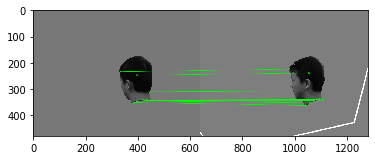

ids are not unique
start icp
step:  0 before:  0.007042951758850469
found the best fit transform 0
12
join 4, 5
ids are not unique
Searching (head 4 and 5), 0/84 done, Error: 0.02376534749496983
ids are not unique
Searching (head 4 and 5), 1/84 done, Error: 0.02428421266757258
ids are not unique
Searching (head 4 and 5), 2/84 done, Error: 0.021143755321693443
ids are not unique
Searching (head 4 and 5), 3/84 done, Error: 0.021848139600561242
ids are not unique
Searching (head 4 and 5), 4/84 done, Error: 0.023919902959847514
ids are not unique
Searching (head 4 and 5), 5/84 done, Error: 0.026942825521997296
ids are not unique
Searching (head 4 and 5), 6/84 done, Error: 0.027432636180805173
ids are not unique
Searching (head 4 and 5), 7/84 done, Error: 0.022317889560968272
ids are not unique
Searching (head 4 and 5), 8/84 done, Error: 0.026270737040299228
ids are not unique
Searching (head 4 and 5), 9/84 done, Error: 0.020802402728453503
ids are not unique
Searching (head 4 and 5), 10/84

/Users/caseliang/Repositories/AV_CW/Procrustes2.py:62: RuntimeWarning: invalid value encountered in true_divide
  X0 /= normX
/Users/caseliang/Repositories/AV_CW/Procrustes2.py:63: RuntimeWarning: invalid value encountered in true_divide
  Y0 /= normY


ids are not unique
Searching (head 4 and 5), 48/84 done, Error: 0.025794106016417483
ids are not unique
Searching (head 4 and 5), 49/84 done, Error: 0.02539132692454684
ids are not unique
Searching (head 4 and 5), 50/84 done, Error: 0.026079532361604076
ids are not unique
Searching (head 4 and 5), 51/84 done, Error: 0.02905026960952787
ids are not unique
Searching (head 4 and 5), 52/84 done, Error: 0.02483618076253416
ids are not unique
Searching (head 4 and 5), 53/84 done, Error: 0.025119135560504605
ids are not unique


/Users/caseliang/Repositories/AV_CW/Procrustes2.py:62: RuntimeWarning: invalid value encountered in true_divide
  X0 /= normX
/Users/caseliang/Repositories/AV_CW/Procrustes2.py:63: RuntimeWarning: invalid value encountered in true_divide
  Y0 /= normY


ids are not unique
ids are not unique
Searching (head 4 and 5), 57/84 done, Error: 0.053423601153703454
ids are not unique
Searching (head 4 and 5), 58/84 done, Error: 0.05297006056145388
ids are not unique
Searching (head 4 and 5), 59/84 done, Error: 0.05281884725323582
ids are not unique
Searching (head 4 and 5), 60/84 done, Error: 0.0590142039894829
ids are not unique
Searching (head 4 and 5), 61/84 done, Error: 0.042338748254545505
ids are not unique
Searching (head 4 and 5), 62/84 done, Error: 0.04262880980048743
ids are not unique
Searching (head 4 and 5), 63/84 done, Error: 0.0683008911544361
ids are not unique
Searching (head 4 and 5), 64/84 done, Error: 0.04274394549047146
ids are not unique
Searching (head 4 and 5), 65/84 done, Error: 0.04244487296562069
ids are not unique


/Users/caseliang/Repositories/AV_CW/Procrustes2.py:62: RuntimeWarning: invalid value encountered in true_divide
  X0 /= normX
/Users/caseliang/Repositories/AV_CW/Procrustes2.py:63: RuntimeWarning: invalid value encountered in true_divide
  Y0 /= normY


ids are not unique
Not enough matches are found - 4/4, turn up the match ratio.
Not enough matches are found - 4/4, turn up the match ratio.
Not enough matches are found - 4/4, turn up the match ratio.
ids are not unique
Searching (head 4 and 5), 72/84 done, Error: 0.07457213108539282
ids are not unique
Searching (head 4 and 5), 73/84 done, Error: 0.07620681021007643
ids are not unique
Searching (head 4 and 5), 74/84 done, Error: 0.08245988646972983


/Users/caseliang/Repositories/AV_CW/Procrustes2.py:62: RuntimeWarning: invalid value encountered in true_divide
  X0 /= normX
/Users/caseliang/Repositories/AV_CW/Procrustes2.py:63: RuntimeWarning: invalid value encountered in true_divide
  Y0 /= normY


Not enough matches are found - 3/4, turn up the match ratio.
Not enough matches are found - 3/4, turn up the match ratio.
Not enough matches are found - 3/4, turn up the match ratio.
25 min_error 0.01994006992497433 params: [ 0.02 20.    2.  ]


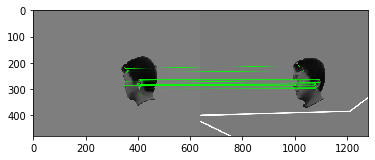

ids are not unique
start icp
step:  0 before:  0.014545298346082257
found the best fit transform 0
13
join 5, 6
ids are not unique
Searching (head 5 and 6), 0/84 done, Error: 0.02490396136018491
ids are not unique
Searching (head 5 and 6), 1/84 done, Error: 0.029120285866226205
ids are not unique
Searching (head 5 and 6), 2/84 done, Error: 0.02596177416940529
ids are not unique
Searching (head 5 and 6), 3/84 done, Error: 0.029798347596251582
ids are not unique
Searching (head 5 and 6), 4/84 done, Error: 0.025304441108925747
ids are not unique
Searching (head 5 and 6), 5/84 done, Error: 0.029716126877855634
ids are not unique
Searching (head 5 and 6), 6/84 done, Error: 0.030700131956093196
ids are not unique
Searching (head 5 and 6), 7/84 done, Error: 0.030225221322969675
ids are not unique
Searching (head 5 and 6), 8/84 done, Error: 0.052976560340510535
ids are not unique
Searching (head 5 and 6), 9/84 done, Error: 0.0349928367401413
ids are not unique
Searching (head 5 and 6), 10/84 d

/Users/caseliang/Repositories/AV_CW/Procrustes2.py:62: RuntimeWarning: invalid value encountered in true_divide
  X0 /= normX
/Users/caseliang/Repositories/AV_CW/Procrustes2.py:63: RuntimeWarning: invalid value encountered in true_divide
  Y0 /= normY


Not enough matches are found - 3/4, turn up the match ratio.
Not enough matches are found - 3/4, turn up the match ratio.
Not enough matches are found - 3/4, turn up the match ratio.
12 min_error 0.016671543688280444 params: [ 0.02 10.    1.  ]


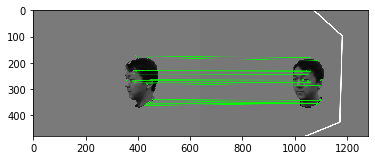

ids are not unique
start icp
step:  0 before:  0.00919321232466988
found the best fit transform 0
14
join 6, 7
ids are not unique
Searching (head 6 and 7), 0/84 done, Error: 0.0221268350028763
ids are not unique
Searching (head 6 and 7), 1/84 done, Error: 0.020488208811020654
ids are not unique
Searching (head 6 and 7), 2/84 done, Error: 0.020581568389054197
ids are not unique
Searching (head 6 and 7), 3/84 done, Error: 0.020746735710927958
ids are not unique
Searching (head 6 and 7), 4/84 done, Error: 0.018200086320036002
ids are not unique
Searching (head 6 and 7), 5/84 done, Error: 0.019081136948003535
ids are not unique
Searching (head 6 and 7), 6/84 done, Error: 0.021036474917532938
ids are not unique
Searching (head 6 and 7), 7/84 done, Error: 0.022194580520202567
ids are not unique
Searching (head 6 and 7), 8/84 done, Error: 0.023084966520362585
ids are not unique
Searching (head 6 and 7), 9/84 done, Error: 0.021241003681476762
ids are not unique
Searching (head 6 and 7), 10/84 

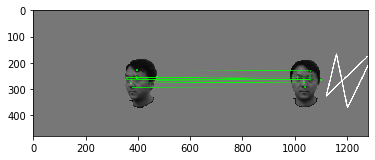

start icp
step:  0 before:  0.009889067178401836
found the best fit transform 0
completed


In [101]:
make_mhead(all_heads,7,14)